<a href="https://colab.research.google.com/github/cmskzhan/helloworld/blob/master/concepts/python/public/scikit-linearegression" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [15]:
import pandas as pd
import numpy as np
# from sklearn.datasets import load_breast_cancer
from pandas_datareader import data as web
df = web.DataReader("MSCI", data_source='yahoo', start='01-01-2015')

In [16]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,47.939999,46.930000,47.689999,47.689999,477500.0,44.373196
2015-01-05,47.590000,46.799999,47.430000,47.240002,814100.0,43.954487
2015-01-06,49.549999,47.540001,47.599998,48.610001,1961000.0,45.229206
2015-01-07,49.790001,48.439999,48.880001,49.720001,1257700.0,46.262001
2015-01-08,51.270000,49.680000,50.060001,51.220001,1287600.0,47.657684
...,...,...,...,...,...,...
2021-02-24,417.549988,405.450012,411.869995,417.230011,480600.0,417.230011
2021-02-25,420.489990,400.500000,417.799988,406.299988,906400.0,406.299988
2021-02-26,420.579987,409.440002,410.829987,414.519989,662200.0,414.519989


In [4]:
df.shape

(293, 6)

In [17]:
X = df.drop(['Close', 'Adj Close'], axis=1)
Y = df['Close']
X

,High,Low,Open,Volume
Date,,,,
2015-01-02,47.939999,46.930000,47.689999,477500.0
2015-01-05,47.590000,46.799999,47.430000,814100.0
2015-01-06,49.549999,47.540001,47.599998,1961000.0
2015-01-07,49.790001,48.439999,48.880001,1257700.0
2015-01-08,51.270000,49.680000,50.060001,1287600.0
...,...,...,...,...
2021-02-24,417.549988,405.450012,411.869995,480600.0
2021-02-25,420.489990,400.500000,417.799988,906400.0
2021-02-26,420.579987,409.440002,410.829987,662200.0


In [18]:
X.columns

Index(['High', 'Low', 'Open', 'Volume'], dtype='object')

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1 )

In [20]:
from sklearn.linear_model import LinearRegression
l_model = LinearRegression(normalize = True).fit(x_train, y_train)
print("Linear Regression Model Traininig Score:", l_model.score(x_train, y_train))

Linear Regression Model Traininig Score: 0.9997890205759676


In [21]:
predicators = x_train.columns
weights = pd.Series(l_model.coef_, predicators)
weights

High      8.220667e-01
Low       8.690401e-01
Open     -6.908593e-01
Volume    5.366757e-08
dtype: float64

In [22]:
y_predicate = l_model.predict(x_test)

In [23]:
pred_vs_actual = pd.DataFrame({'predicted': y_predicate, 'actual': y_test})
pred_vs_actual.head(20)

,predicted,actual
Date,,
2019-08-01,230.238819,225.330002
2016-10-24,83.270799,83.220001
2015-04-08,61.876429,61.830002
2018-07-17,171.274190,170.740005
2020-10-26,349.346172,349.559998
2015-07-09,61.990915,62.230000
2016-03-22,71.754724,71.629997
2016-02-11,65.609877,65.260002
2017-11-03,123.957306,126.040001


In [24]:
from sklearn.metrics import r2_score
print("R2 score for linear regression test is: ", r2_score(y_predicate, y_test))

R2 score for linear regression test is:  0.999781714088531


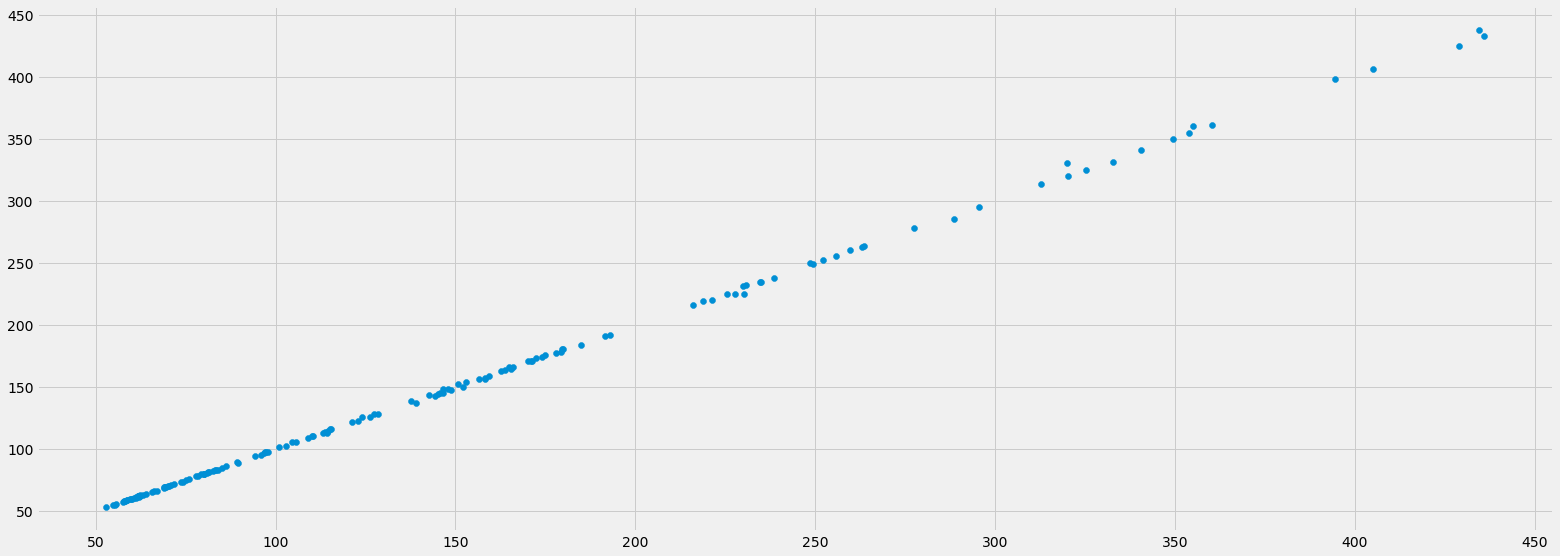

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24.2,9))
#plt.scatter(df.index, df['TS_buy'], color = 'green', label = 'TS buy', marker = '^', alpha = 1)
#plt.scatter(df.index, df['TS_sell'], color = 'red', label = 'TS sell', marker = 'v', alpha = 1)
plt.scatter(y_predicate, y_test)
plt.show()

In [30]:
# to compare predicted and actual
pred_vs_actual.sort_index()

,predicted,actual
Date,,
2015-01-15,52.891705,52.900002
2015-02-03,54.889169,54.830002
2015-02-04,55.438421,55.130001
2015-02-17,57.472233,57.349998
2015-02-20,57.730565,58.029999
...,...,...
2020-11-04,394.549102,398.220001
2020-12-22,434.536054,437.579987
2021-02-02,428.975092,425.130005


In [32]:
show_diff = pred_vs_actual.sort_index().reset_index(drop=True)
show_diff

,predicted,actual
0,52.891705,52.900002
1,54.889169,54.830002
2,55.438421,55.130001
3,57.472233,57.349998
4,57.730565,58.029999
...,...,...
151,394.549102,398.220001
152,434.536054,437.579987
153,428.975092,425.130005
154,435.947604,432.970001


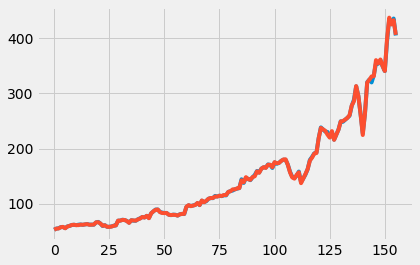

In [33]:
plt.plot(show_diff['predicted'], label='predicted')
plt.plot(show_diff['actual'], label='actual')
plt.show()